#STEP-1 Starting with Data Preprocessing and EDA

In [3]:
#importing the modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
job_data = pd.read_csv("fake_job_postings.csv")

In [5]:
job_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [6]:
# Display summary statistics for numerical columns
print(job_data.describe())

             job_id  telecommuting  has_company_logo  has_questions  \
count  17880.000000   17880.000000      17880.000000   17880.000000   
mean    8940.500000       0.042897          0.795302       0.491723   
std     5161.655742       0.202631          0.403492       0.499945   
min        1.000000       0.000000          0.000000       0.000000   
25%     4470.750000       0.000000          1.000000       0.000000   
50%     8940.500000       0.000000          1.000000       0.000000   
75%    13410.250000       0.000000          1.000000       1.000000   
max    17880.000000       1.000000          1.000000       1.000000   

         fraudulent  
count  17880.000000  
mean       0.048434  
std        0.214688  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  


In [7]:
job_data.shape

(17880, 18)

In [8]:
job_data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [9]:
#we can see nan values, lets count there number for each columns
# Assuming df is your DataFrame
# Assuming df is your DataFrame
nan_count_per_column = job_data.isna().sum()
# or df.isnull().sum()

print(nan_count_per_column)

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64


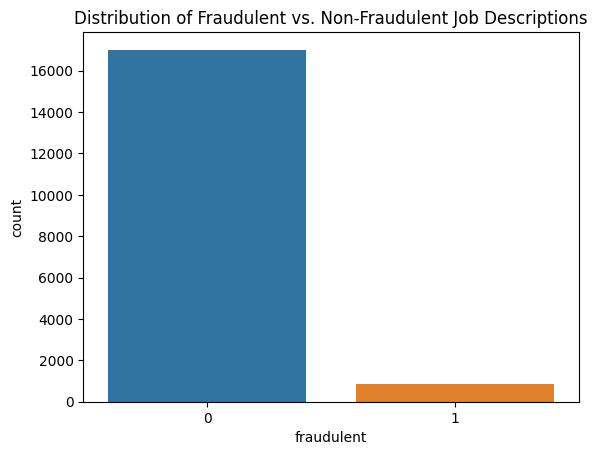

In [10]:
# Visualize the distribution of the target variable (fraudulent)
sns.countplot(x='fraudulent', data=job_data)
plt.title('Distribution of Fraudulent vs. Non-Fraudulent Job Descriptions')
plt.show()

This code uses seaborn to create a count plot of the target variable (fraudulent). It helps visualize the balance or imbalance between fraudulent and non-fraudulent job descriptions.

title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64
 10  has_company_logo     17880 non-null  int64
 11  has_questions        17880 non-null  int64
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  function             11425 non-null  object

### **Let's Explore Some Categorical Variables**

This code provides insights into the unique values and their counts for each categorical column.

In [11]:
# Explore unique values in categorical columns
categorical_columns = ['title', 'location','department', 'employment_type', 'required_experience', 'required_education', 'industry', 'function']

for col in categorical_columns:
    print(f"Unique values in {col}: {job_data[col].unique()}\n")
    print(f"Value counts in {col}:\n{job_data[col].value_counts()}\n")
    print("\n")


Unique values in title: ['Marketing Intern' 'Customer Service - Cloud Video Production'
 'Commissioning Machinery Assistant (CMA)' ...
 'Senior Financial Analyst (Retail) ' 'Account Director - Distribution '
 'Project Cost Control Staff Engineer - Cost Control Exp - TX']

Value counts in title:
English Teacher Abroad                                         311
Customer Service Associate                                     146
Graduates: English Teacher Abroad (Conversational)             144
English Teacher Abroad                                          95
Software Engineer                                               86
                                                              ... 
West Coast Regional Channel Manager (RCM)                        1
BI Practice Manager                                              1
Community Coordinator- Ambassador Programme                      1
Senior Traffic Engineer                                          1
Project Cost Control Staff Enginee

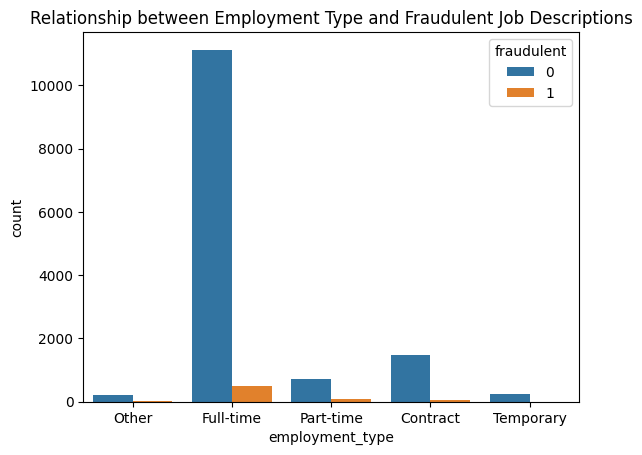

In [12]:
# Visualize the relationship between employment_type and fraudulent
sns.countplot(x='employment_type', hue='fraudulent', data=job_data)
plt.title('Relationship between Employment Type and Fraudulent Job Descriptions')
plt.show()




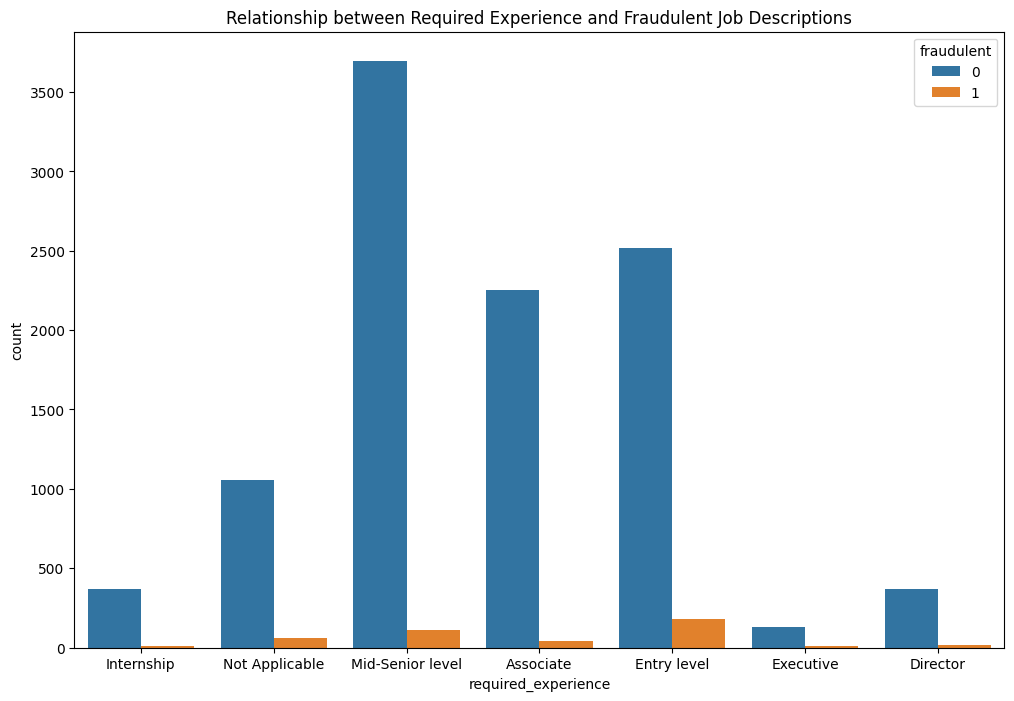

In [13]:
# Visualize the relationship between required_experience and fraudulent
plt.figure(figsize=(12, 8))  # Set the width and height of the figure
sns.countplot(x='required_experience', hue='fraudulent', data=job_data)
plt.title('Relationship between Required Experience and Fraudulent Job Descriptions')
plt.show()

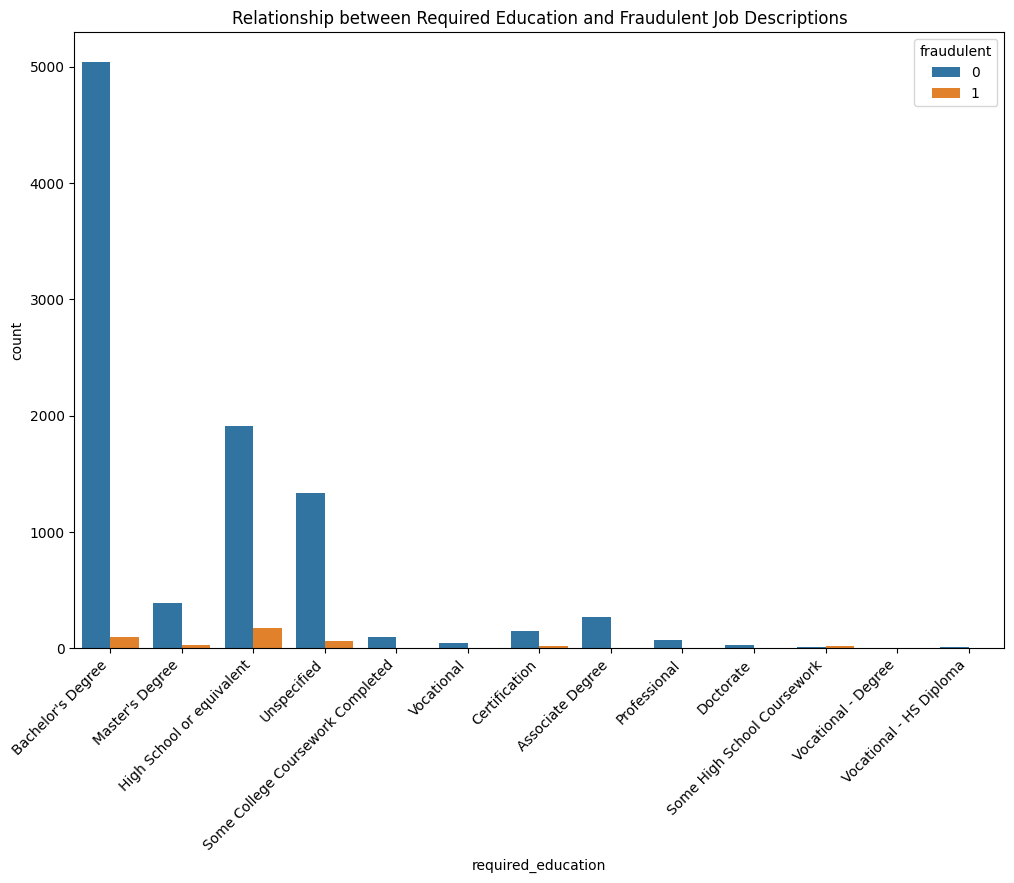

In [14]:
# Set the width and height of the figure
plt.figure(figsize=(12, 8))

# Visualize the relationship between required_education and fraudulent
ax = sns.countplot(x='required_education', hue='fraudulent', data=job_data)

# Rotate x-axis labels for better visibility
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.title('Relationship between Required Education and Fraudulent Job Descriptions')
plt.show()


In [15]:
# Check for missing values in each column
missing_values = job_data.isnull().sum()

# Display columns with missing values
columns_with_missing_values = missing_values[missing_values > 0].index
print("Columns with missing values:", columns_with_missing_values)

print("\n")

print(missing_values)

Columns with missing values: Index(['location', 'department', 'salary_range', 'company_profile',
       'description', 'requirements', 'benefits', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function'],
      dtype='object')


job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64


In [16]:
# Fill missing values in the 'location' column with a specific value, for example, 'Unknown'
job_data['location'].fillna('', inplace=True)

In [17]:
job_data['company_profile'].fillna('', inplace=True)

In [18]:
job_data['requirements'].fillna('', inplace=True)

In [19]:
# text_columns = ['title', 'location', 'department', 'company_profile', 'description', 'requirements', 'benefits']

# for col in text_columns:
#     job_data[col] = job_data[col].str.lower()


In [20]:
job_data['location']

0            US, NY, New York
1              NZ, , Auckland
2               US, IA, Wever
3          US, DC, Washington
4          US, FL, Fort Worth
                 ...         
17875         CA, ON, Toronto
17876    US, PA, Philadelphia
17877         US, TX, Houston
17878           NG, LA, Lagos
17879       NZ, N, Wellington
Name: location, Length: 17880, dtype: object

In [21]:
#Extracting only those columns which have datatype as object

# Get column names with data type 'object'
columns_text_data = job_data.select_dtypes(include='object').columns.tolist()

# Print the resulting list of column names
print(columns_text_data)

['title', 'location', 'department', 'salary_range', 'company_profile', 'description', 'requirements', 'benefits', 'employment_type', 'required_experience', 'required_education', 'industry', 'function']


In [22]:
job_data[columns_text_data] = job_data[columns_text_data].fillna(' ')


In [23]:
job_data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0,1,0,Other,Internship,,,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,0,1,0,,,,,,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",,,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [24]:
#we can see location have country, state. We will only consider country

# Spliting the location column to extract only the country
job_data['country'] = job_data['location'].str.split(',').str[0]

#printing the result
job_data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country
0,1,Marketing Intern,"US, NY, New York",Marketing,,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0,1,0,Other,Internship,,,Marketing,0,US
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,,Marketing and Advertising,Customer Service,0,NZ
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,0,1,0,,,,,,0,US
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US
4,5,Bill Review Manager,"US, FL, Fort Worth",,,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US


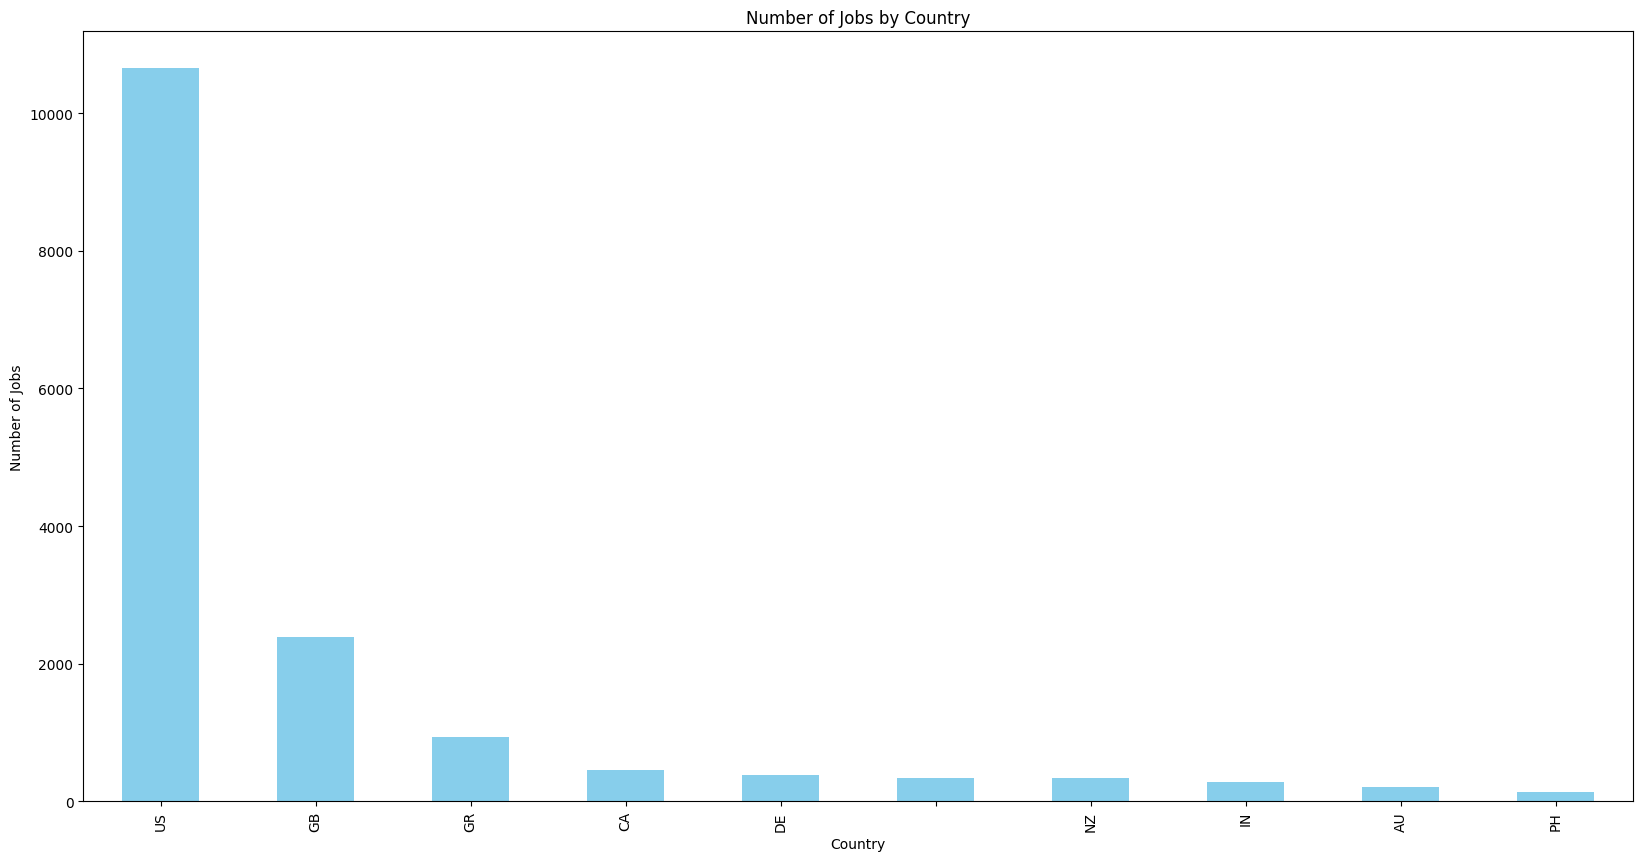

In [25]:
#counting number of jobs in each country
count_job_per_country = job_data['country'].value_counts()[:10]

#creating the bar chart
plt.figure(figsize=(20, 10))
count_job_per_country.plot(kind='bar', color='skyblue')
plt.title('Number of Jobs by Country')
plt.xlabel('Country')
plt.ylabel('Number of Jobs')
plt.show()

### Applying Various Modules on our Dataset

#####MODEL- 1 LOGISTIC REGRESSION

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score


In [27]:
job_data_new = job_data.drop(['job_id','requirements','benefits','description','location','country'], axis=1)
job_data_new = job_data.drop(['job_id','requirements','benefits','description','location','country'], axis=1)

In [28]:
def convert_to_average(salary_range):
    try:
        min_salary, max_salary = map(int, salary_range.split('-'))
        return (min_salary + max_salary) / 2
    except:
        return np.nan  # Return NaN for invalid or missing values

job_data_new['salary_range'] = job_data_new['salary_range'].apply(convert_to_average)

#### Performing Feature Engineering required for Logistic Regression approach

In [29]:
# Example for 'company_profile'
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can tune 'max_features'
company_profile_tfidf = tfidf_vectorizer.fit_transform(job_data['company_profile'])

# Convert to DataFrame (optional, depends on how you'll handle concatenation later)
company_profile_df = pd.DataFrame(company_profile_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [30]:
#categorical_cols = ['title','department','employment_type', 'required_experience', 'industry']
categorical_cols = ['title','department']
# Apply one-hot encoding
features = pd.get_dummies(job_data_new, columns=categorical_cols)

In [31]:
# Assuming 'features' is your initial set of numeric features
features = job_data_new.drop(['title','department','salary_range','company_profile', 'employment_type', 'required_experience', 'required_education', 'industry', 'function'], axis=1)
features

,telecommuting,has_company_logo,has_questions,fraudulent
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,1,0
...,...,...,...,...
17875,0,1,1,0
17876,0,1,1,0
17877,0,0,0,0
17878,0,0,1,0


In [32]:
# Concatenate the TF-IDF features and one-hot encoded features
final_features = pd.concat([features, company_profile_df], axis=1)


In [33]:
# Split the data into features and target label
features = final_features.drop('fraudulent', axis=1)
target = final_features['fraudulent']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [34]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9608501118568232


In [35]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[3395    0]
 [ 140   41]]


In [36]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3395
           1       1.00      0.23      0.37       181

    accuracy                           0.96      3576
   macro avg       0.98      0.61      0.67      3576
weighted avg       0.96      0.96      0.95      3576



In [37]:
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f"ROC AUC Score: {roc_auc}")


ROC AUC Score: 0.9546432436390857


#### MODEL - 2 KNN


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

In [39]:
feature_vars = job_data.drop(['fraudulent'], axis=1)
target_vars = job_data['fraudulent']

In [40]:
le = LabelEncoder()
for col in ['location', 'department', 'company_profile', 'description', 'requirements', 'benefits', 'industry', 'function']:
    feature_vars[col] = le.fit_transform(feature_vars[col])

In [41]:
job_data_dummy = pd.get_dummies(feature_vars)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(job_data_dummy, target_vars, test_size=0.2, random_state=42)

In [43]:
knn_cls = KNeighborsClassifier(n_neighbors=5)
knn_cls.fit(X_train, y_train)

KNeighborsClassifier()

In [44]:
knn_preds = knn_cls.predict(X_test)

In [45]:
accuracy_score_knn = accuracy_score(y_test, knn_preds)
print("Accuracy Score of KNN Classifier:", accuracy_score_knn)

Accuracy Score of KNN Classifier: 0.9630872483221476


In [46]:
confusion_matrix_knn = confusion_matrix(y_test, knn_preds)
print("Confusion Matrix of KNN Classifier:",confusion_matrix_knn)

Confusion Matrix of KNN Classifier: [[3364   31]
 [ 101   80]]


In [47]:
classification_report_knn = classification_report(y_test, knn_preds)
print("Classification Report of KNN Classifier:",classification_report_knn)

Classification Report of KNN Classifier:               precision    recall  f1-score   support

           0       0.97      0.99      0.98      3395
           1       0.72      0.44      0.55       181

    accuracy                           0.96      3576
   macro avg       0.85      0.72      0.76      3576
weighted avg       0.96      0.96      0.96      3576



In [48]:
roc_auc_knn = roc_auc_score(y_test, knn_preds)
print("ROC-AUC Score for KNN Classifier::", roc_auc_knn)

ROC-AUC Score for KNN Classifier:: 0.7164289375828933


#### MODEL - 3 RANDOM FOREST

In [49]:
random_forest_cls = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_cls.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [50]:
random_forest_preds = random_forest_cls.predict(X_test)

In [51]:
accuracy_score_rf = accuracy_score(y_test, random_forest_preds)
print("Accuracy Score of Random Forest Classifier:", accuracy_score_rf)

Accuracy Score of Random Forest Classifier: 0.9832214765100671


In [52]:
confusion_matrix_rf = confusion_matrix(y_test, random_forest_preds)
print("Confusion Matrix of Random Forest Classifier:",confusion_matrix_rf)

Confusion Matrix of Random Forest Classifier: [[3395    0]
 [  60  121]]


In [53]:
classification_report_rf = classification_report(y_test, random_forest_preds)
print("Classification Report of Random Forest Classifier:",classification_report_rf)

Classification Report of Random Forest Classifier:               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3395
           1       1.00      0.67      0.80       181

    accuracy                           0.98      3576
   macro avg       0.99      0.83      0.90      3576
weighted avg       0.98      0.98      0.98      3576



In [54]:
# Assuming y_test and random_forest_preds are your true labels and predicted labels, respectively
roc_score_rf = roc_auc_score(y_test, random_forest_preds)
print("ROC-AUC Score of Random Forest Classifier:", roc_score_rf)


ROC-AUC Score of Random Forest Classifier: 0.8342541436464088


~ We tried 3 different models.
* So we will move forward with more complex model (DEEP LEARNING).
* AS we can that the dataset columns which have textual information so first we will do Text Preprocessing using NLP
* After that we will implement Deep Learning model


### Text Preprocessing



~ We will be doing text processing on description column so first check number of null values for discription

In [55]:
empty_description = job_data['description'] == " "

# Print rows where 'description' is an empty string
job_data[empty_description]

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country
17513,17514,Office Manager,"PL, MZ, Warsaw",,,,,,,0,0,0,,,,,,1,PL


~as there is only one row so we will remove that row

In [56]:
job_data = job_data[~empty_description]

job_data.shape

(17879, 19)

In [57]:
# for query search and  text preprocessing we will be combining the description and title column

job_data['job_text_info'] = job_data['title'] + ' ' + job_data['description'] + ' ' + job_data['company_profile']
#+ ' ' + job_data['industry'] + ' ' + job_data['department'] + ' ' + job_data['employment_type'] + ' ' + job_data['required_experience'] + ' ' + job_data['industry']

# Drop the 'job_title' and 'description' columns if needed
# df = df.drop(['job_title', 'description'], axis=1)

# Print the resulting DataFrame
job_data.head()

<ipython-input-57-9c63472830b6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  job_data['job_text_info'] = job_data['title'] + ' ' + job_data['description'] + ' ' + job_data['company_profile']


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country,job_text_info
0,1,Marketing Intern,"US, NY, New York",Marketing,,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0,1,0,Other,Internship,,,Marketing,0,US,"Marketing Intern Food52, a fast-growing, James..."
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,,Marketing and Advertising,Customer Service,0,NZ,Customer Service - Cloud Video Production Orga...
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,0,1,0,,,,,,0,US,Commissioning Machinery Assistant (CMA) Our cl...
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US,Account Executive - Washington DC THE COMPANY:...
4,5,Bill Review Manager,"US, FL, Fort Worth",,,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US,Bill Review Manager JOB TITLE: Itemization Rev...


In [58]:
##LowerCasing

job_data['job_text_info'] = job_data['job_text_info'].str.lower()


In [59]:
#removing punctuations
# import string

# job_data['job_text_info'] = job_data['job_text_info'].str.translate(str.maketrans('', '', string.punctuation))


import string

# Convert 'job_text_info' column to strings
job_data['job_text_info'] = job_data['job_text_info'].astype(str)

# Remove punctuations
job_data['job_text_info'] = job_data['job_text_info'].str.translate(str.maketrans('', '', string.punctuation))



In [60]:
#tokenization
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

job_data['job_text_info'] = job_data['job_text_info'].apply(word_tokenize)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [61]:
#remove stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
job_data['job_text_info'] = job_data['job_text_info'].apply(lambda x: [word for word in x if word not in stop_words])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [62]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [63]:
#lemmatization
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
job_data['job_text_info'] = job_data['job_text_info'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])


[nltk_data] Downloading package wordnet to /root/nltk_data...


In [64]:
#joining back to text
job_data['job_text_info'] = job_data['job_text_info'].apply(lambda x: ' '.join(x))

In [65]:
job_data['job_text_info'].head(5)

0    marketing intern food52 fastgrowing james bear...
1    customer service cloud video production organi...
2    commissioning machinery assistant cma client l...
3    account executive washington dc company esri –...
4    bill review manager job title itemization revi...
Name: job_text_info, dtype: object

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Use TfidfVectorizer on the modified column
vectorizer = TfidfVectorizer(max_features=9000)  # Adjust max_features as needed
X = vectorizer.fit_transform(job_data['job_text_info'])


In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, job_data['fraudulent'], test_size=0.2, random_state=42)


In [68]:
# Assuming you have X_train, X_test, y_train, and y_test

# Print shape and data type of X_train
print("X_train Shape:", X_train.shape)
print("X_train Data Type:", type(X_train))

# Print shape and data type of X_test
print("\nX_test Shape:", X_test.shape)
print("X_test Data Type:", type(X_test))

# Print shape and data type of y_train
print("\ny_train Shape:", y_train.shape)
print("y_train Data Type:", type(y_train))

# Print shape and data type of y_test
print("\ny_test Shape:", y_test.shape)
print("y_test Data Type:", type(y_test))


X_train Shape: (14303, 9000)
X_train Data Type: <class 'scipy.sparse._csr.csr_matrix'>

X_test Shape: (3576, 9000)
X_test Data Type: <class 'scipy.sparse._csr.csr_matrix'>

y_train Shape: (14303,)
y_train Data Type: <class 'pandas.core.series.Series'>

y_test Shape: (3576,)
y_test Data Type: <class 'pandas.core.series.Series'>


#### MODEL - 4 Neural Network

In [69]:
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

In [70]:
# #Instatiatie our MLPClassifier
mlp = MLPClassifier(solver='adam',
                    activation = 'relu',
                   hidden_layer_sizes = (100,50,30),
                    max_iter = 1000)

In [71]:
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 50, 30), max_iter=1000)

In [72]:
mlp_pred = mlp.predict(X_test)

#Printing out our evaluation metrics
print(roc_auc_score(y_test, mlp_pred))
print(classification_report(y_test, mlp_pred))

0.8819636462535696
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3394
           1       0.89      0.77      0.82       182

    accuracy                           0.98      3576
   macro avg       0.94      0.88      0.91      3576
weighted avg       0.98      0.98      0.98      3576



In [73]:
accuracy = accuracy_score(y_test, mlp_pred)

print(f'Accuracy: {accuracy:.2%}')

Accuracy: 98.32%


In [74]:
print(job_data.shape)

(17879, 20)


In [75]:
print(X.shape)

(17879, 9000)


#### Implementing search query by finding the cosine similarity

In [76]:
# Count occurrences of " " for each column
empty_string_values_per_column = (job_data == " ").sum()

# Display the result
print(empty_string_values_per_column)

job_id                     0
title                      0
location                   0
department             11552
salary_range           15011
company_profile            0
description                0
requirements               0
benefits                7209
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3470
required_experience     7049
required_education      8104
industry                4902
function                6454
fraudulent                 0
country                    0
job_text_info              0
dtype: int64


In [77]:
from sklearn.metrics.pairwise import cosine_similarity
import string

def search_for_jobs(query, data, vectorizer, job_data):
    # Preprocess the query
    query = query.lower()
    query = query.translate(str.maketrans('', '', string.punctuation))
    query = word_tokenize(query)
    query = [word for word in query if word not in stop_words]
    query = [lemmatizer.lemmatize(word) for word in query]
    query = ' '.join(query)

    # Vectorize the query
    query_vector = vectorizer.transform([query])

    # Compute cosine similarity between the query and job descriptions
    similarities = cosine_similarity(query_vector, data)

    # Get indices of jobs sorted by similarity (descending order)
    indices = similarities.argsort()[0][::-1]
    indices = indices[:20]
    selected_rows = job_data.loc[indices]

    # Return the indices of relevant jobs
    return selected_rows

# Example usage
user_query = "interested in finance"
result_indices = search_for_jobs(user_query, X, vectorizer, job_data)

# Display the indices
result_indices


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country,job_text_info
17719,17720,CUSTOMER SERVICE REP,"US, TX, DALLAS",,,,DescriptionJob Title: Customer Service Represe...,HIGH SCHOOL DIPLOMA,"HEALTH,DENTAL INSURANCE , 401K , STOCK PLAN FO...",0,0,0,Full-time,Associate,High School or equivalent,Consumer Services,Customer Service,1,US,customer service rep descriptionjob title cust...
7830,7831,Position Finance Assistant,"AU, VIC, Melbourne",,25000-30000,,"We have positions available for confident, out...",Personal attributes would include: • Intermedi...,Benefits include: · Base wage of $450 per week...,0,0,0,Part-time,,,Banking,Finance,1,AU,position finance assistant position available ...
12721,12722,Finance Analyst (Fixed term contract),"GB, LND, Shoreditch",Finance,,ustwo offers you the opportunity to be yoursel...,Ustwo London are looking for an experienced Fi...,Technical requirements/skillsBring numbers to ...,Above anything we are people centred company t...,0,1,0,Contract,Mid-Senior level,,,Finance,0,GB,finance analyst fixed term contract ustwo lond...
7642,7643,Banking and Finance Attorney,"US, NC, Charlotte",Legal,,,Special Counsel’s Charlotte office is searchin...,,,0,1,1,,,,,,0,US,banking finance attorney special counsel ’ cha...
4237,4238,Senior Associate Corporate Finance & Planning,"PK, IS, Islamabad",Finance,,,Position Title: Senior Associate Corporate Fin...,Essential Requirements:-- Experience in IPP (I...,,0,0,1,,,,,,0,PK,senior associate corporate finance planning po...
4671,4672,Assistant Manager Corporate Finance & Planning,"PK, IS, Islamabad",,,,Position Title: Assistant Manager Corporate Fi...,Essential Requirements (by Career Pakistan): S...,,0,0,1,,,,,,0,PK,assistant manager corporate finance planning p...
1448,1449,Finance Manager,"GB, LND, London",Accounts,22000-30000,Wedo is a collection of niched e-commerce stor...,About us:Wedo is a curated collection of niche...,"Qualifications:Currently studying towards AAT,...","Salary: £22,000- 30,000 p/a depending on exper...",0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Finance,0,GB,finance manager uswedo curated collection nich...
9618,9619,Finance and Accounting Analyst,"BR, SP, São Paulo",,,"Nubank is an early stage, technology-driven fi...",Why is the Finance &amp; Accounting Analyst po...,This kind of experience/background is relevant...,"Competitive compensation packageHealth, dental...",0,1,1,Full-time,,,Financial Services,,0,BR,finance accounting analyst finance amp account...
14947,14948,Freelance Writer -- Finance,"US, ,",Content,,ConsumerTrack is a technology-centric internet...,Have you written extensively on finance or per...,Previous freelance writing experience (samples...,,1,1,1,,,,,,0,US,freelance writer finance written extensively f...
8504,8505,Attorney,"US, NV, Las Vegas",,,Tidewater Finance Co. was established in 1992 ...,"Tidewater Finance Company, an industry leader ...","Required Education, Experience and SkillsBach...",Our company offers a competitive salary plus B...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Financial Services,Legal,0,US,attorney tidewater finance company industry le...


In [78]:
# from sklearn.metrics.pairwise import cosine_similarity
# import string

# def search_for_jobs(query, data, vectorizer, job_data):
#     # Preprocess the query
#     query = query.lower()
#     query = query.translate(str.maketrans('', '', string.punctuation))
#     query = word_tokenize(query)
#     query = [word for word in query if word not in stop_words]
#     query = [lemmatizer.lemmatize(word) for word in query]
#     query = ' '.join(query)

#     # Vectorize the query
#     query_vector = vectorizer.transform([query])

#     # Compute cosine similarity between the query and job descriptions
#     similarities = cosine_similarity(query_vector, data)

#     # Get indices of jobs sorted by similarity (descending order)
#     indices = similarities.argsort()[0][::-1]

#     # Return the list of jobs with reset index
#     result = job_data.loc[indices, 'job_text_info'].reset_index(drop=True)
#     return result

# # Example usage
# user_query = "interested in finance"
# result = search_for_jobs(user_query, X, vectorizer, job_data)

# # Display the result
# print(result)
